# Analysis into Fandango Movie Ratings

Back in October 2015, Walt Hickey, a data journalist, analyzed movie ratings data from the Fandango website. Hickey looked at 205 movies from 2015 and found that there was a significant discrepency between the rating showed to users and the actual rating based on reviews (found in the page's HTML code). He published his findings in this [article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

In this project, we'll analyze the ratings data from Fandango for more recent movies to determine if Fandango made any changes to the ratings shown to users after the analysis by Hickey was published.

In [2]:
%matplotlib inline
import matplotlib
from numpy import arange
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Exploring the data

We'll be using two datasets for this project:
- The original data Walt Hickey analyzed for his article, which he made publicly available on GitHub. We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.
- Publicly available movie ratings data for movies released in 2016 and 2017.

The two datasets provide us with data for before and after Hickey's analysis was released.

In [3]:
fandango_comp = pd.read_csv('fandango_score_comparison.csv') # Hickey's original 2015 data
ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv') # Rating data for years 2016 and 2017

In [4]:
fandango_comp.shape

(146, 22)

In [5]:
fandango_comp.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
ratings_16_17.shape

(214, 15)

In [7]:
ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [10]:
# Extracting the columns that will be relevant for this analysis. We'll make copies to avoid any SettingWithCopyWarning later on
fandango_15 = fandango_comp[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_16_17 = ratings_16_17[['movie','year','fandango']].copy()

### Sample Representation

Our goal is to determine if there were any changes to the ratings system of movies on Fandango after Hickey's analysis. Our population should therefore be all movies available on Fandango. The data available in the above sets are not an adequate representation of this population because both authors used selective sampling. Hickey used the criteria of at least 30 Fandango reviews in his analysis, while the 2016/2017 dataset README only mentions that the movies have a cosiderable number of reviews and votes, but does not clearly indicate an exact threshold.

Gathering a dataset that is representative of the population we need would take a considerable amount of effort and is outside the scope of this project, so instead the best option is to shift the focus of our analysis.

### Adjusted Analysis Goal

We'll focus our analysis on movies with tickets sales in the years 2015 and 2016, and with a significant amount of reviews and votes.

The goal of our analysis is to determine if there were changes to the Fandango rating system in 2016, after Hickey's analysis of 2015 movies. For the purposes of our analysis, we'll choose 30 reviews as a significant amount.

All movies in our 2015 set already meet this criteria, but our 2016 data doesn't specify the number of Fandango reviews per movie. To make sure the data meet this requirement, we'll take a random sample of ten movies from the dataset and manually check the Fandango number of reviews.

In [9]:
fandango_16_17.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Number of Fandango reviews:

|Movie|No. of Reviews|
|-----|--------------|
|Mechanic: Resurrection|25,576|
|Warcraft|31,430|
|Max Steel|6,814|
|Me Before You|30,515|
|Fantastic Beasts and Where to Find Them|87,534|
|Cell|3,783|
|Genius|2,872|
|Sully|48,333|
|A Hologram for the King|10,193|
|Captain America: Civil War|179,176|

All ten movies in our sample have 30 or more user reviews, so we are more confident that most of the movies in the data meet this criteria.

### Cleaning Data

We also need to remove movies from years that aren't 2015 or 2016 for our analysis. Hickey's dataset does not include a column with the movies' year but it is included as part of the movie name, in the colum `FILM`. We'll extract the year from this column and use it to create a new `year` column.

In [11]:
fandango_15['year'] = fandango_15['FILM'].str[-5:-1]
fandango_15 = fandango_15[fandango_15['year'] == '2015'] # Filter by the new column so we only include movies from 2015
fandango_15['year'].value_counts()

2015    129
Name: year, dtype: int64

Our second dataset does include a year column, so we're able to go ahead with the filtering as is.

In [12]:
fandango_16 = fandango_16_17[fandango_16_17['year'] == 2016] # Filter by the 'year' column so we only include movies from 2016
fandango_16['year'].value_counts()

2016    191
Name: year, dtype: int64

We can now begin to analyze the movie ratings data for the years 2015 and 2016. We'll start by looking at the kernel density plot for both datasets.

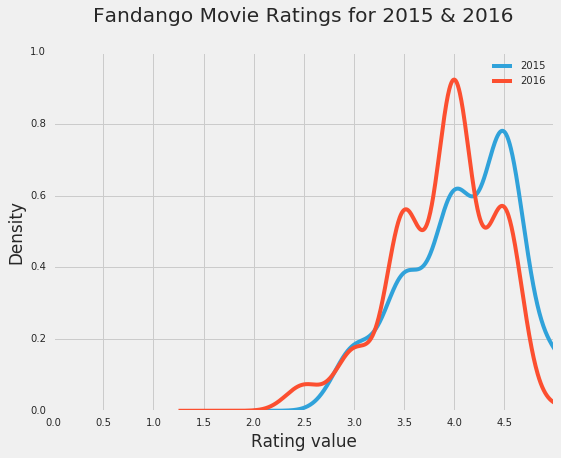

In [12]:
plt.style.use('fivethirtyeight')
fandango_15['Fandango_Stars'].plot.kde(label = 2015, legend = True, figsize = (8,6))
fandango_16['fandango'].plot.kde(label = 2016, legend = True)
plt.title('Fandango Movie Ratings for 2015 & 2016', y = 1.07)
plt.xlim((0,5))
plt.xticks(arange(0,5,.5))
plt.xlabel('Rating value')
plt.show()

For the ratings in 2015, the shape of the distrubtion is left-skewed: most values are to the right hand side of the distribution curve, with the most dense rating being 4.5.

On the other hand, the 2016 data is also left skewed, but less so than the 2015 data. The peak occurs at the rating value of 4.0. We also observe that the distribution is more normal around the peak compared to the 2015 data.

Based on the data, we can tell that there was indeed a change in the Fandango ratings in 2016 compared to 2015. The shift left indicates that 2016 movies were rated lower than 2015 movies.

### Movie Ratings Frequency Tables

Next, we'll take a different approach and look at the frequency tables for the ratings reported in each dataset. We expect to see the same trend as we saw with the density plots.

**Frequency table for 2015 movies (percentage):**

In [13]:
fandango_15['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

**Frequency table for 2016 movies (percentage):**

In [14]:
fandango_16['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the frequency tables, we can still observe there was a shift in the rating distribution from 2016 to 2015. By looking at the peaks in each table and the addition of the 2.5 value in 2016, we can also tell the direction, however, both of these observations are slightly more dificult to make using just the tables.

### Summary statistics

We'll now focus on some summary statistics to verify our earlier observations. We'll start by calculating the mean, median, and mode in each dataset.

In [13]:
mean_15 = fandango_15['Fandango_Stars'].mean()
median_15 = fandango_15['Fandango_Stars'].median()
mode_15 = fandango_15['Fandango_Stars'].mode()[0]
mean_16 = fandango_16['fandango'].mean()
median_16 = fandango_16['fandango'].median()
mode_16 = fandango_16['fandango'].mode()[0]

# We'll store the summary stats in a dataframe that we can use for plotting
stats = pd.DataFrame()
stats['2015'] = [mean_15, median_15, mode_15]
stats['2016'] = [mean_16, median_16, mode_16]
stats.index = ['mean', 'median', 'mode']
stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


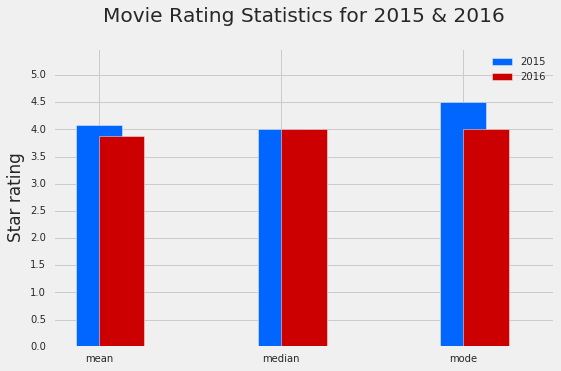

In [36]:
# Plotting the stats store in the dataframe
plt.style.use('fivethirtyeight')
stats['2015'].plot.bar(color = '#0066FF', legend = True, align = 'center', width = 0.25, figsize = (8,5))
stats['2016'].plot.bar(color = '#CC0000', legend = True, rot = 0, align = 'edge', width = 0.25)
plt.title('Movie Rating Statistics for 2015 & 2016', y = 1.07)
plt.ylabel('Star rating')
plt.ylim((0,5.5))
plt.yticks(arange(0,5.5,.5))
plt.show()

Looking at some of the statistics for each year, we can still observe the shift towards lower ratings in 2016: the mean dropped by about 0.2 stars and the mode by 0.5 stars. The mode manages to stay equal both years, at a star rating of 4.0.

### Conclusion:

In this analysis, we looked at the Fandango rating data for popular movies in 2016 and compared the ratings to those of popular movies in 2015. Our goal was to determine if there was a change in the Fandango ratings for movies in 2016, after Hickley's analysis of movies in 2015. We looked at the frequency, distribution, and statistics of star ratings for each year, and were able to observe a change: movies in 2016 were rated lower than those in 2015.

This change is very likely the result of Hickley's analysis of 2015 movies, in which he concluded that the star ratings in Fandango were inflated. This inflation was probably addressed after it was brought to light, leading to lower ratings for 2016 movies.